In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

df_alc = pd.read_csv('./russia_alcohol.csv')
df_dem = pd.read_csv('./russian_demography.csv')

# 1. A look at the data

In [317]:
df_2016_temp.head()

,country,group,value
0,Kuwait,Both sexes,0.00
1,Kuwait,Female,0.00
2,Kuwait,Male,0.00
3,Mauritania,Both sexes,0.00
4,Mauritania,Female,0.00


In [318]:
df_dem.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.90,14.20,12.30,84.66,52.42
1,1990,Altai Krai,1.80,12.90,11.10,80.24,58.07
2,1990,Amur Oblast,7.60,16.20,8.60,69.55,68.37
3,1990,Arkhangelsk Oblast,3.70,13.50,9.80,73.26,73.63
4,1990,Astrakhan Oblast,4.70,15.10,10.40,77.05,68.01


In [319]:
df_dem.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,"2,380.00","2,317.00","2,317.00","2,315.00","2,330.00","2,330.00"
mean,"2,003.50",-2.34,11.55,13.90,68.47,69.15
std,8.08,6.06,3.23,3.50,10.45,13.35
min,"1,990.00",-15.90,6.20,3.20,37.50,23.63
25%,"1,996.75",-6.20,9.30,12.10,61.38,62.79
50%,"2,003.50",-3.10,11.00,14.10,68.53,69.58
75%,"2,010.25",0.70,13.00,16.10,76.90,77.62
max,"2,017.00",24.80,29.90,24.90,97.53,100.00


In [320]:
df_alc.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,2.90,18.00,9.50,0.80,0.20


In [321]:
df_alc.describe()

,year,wine,beer,vodka,champagne,brandy
count,"1,615.00","1,552.00","1,557.00","1,554.00","1,552.00","1,549.00"
mean,"2,007.00",5.63,51.26,11.82,1.31,0.53
std,5.48,2.81,25.37,5.13,0.80,0.40
min,"1,998.00",0.10,0.40,0.05,0.10,0.00
25%,"2,002.00",3.58,32.40,8.30,0.80,0.20
50%,"2,007.00",5.40,49.97,11.50,1.20,0.40
75%,"2,012.00",7.38,67.40,15.00,1.67,0.70
max,"2,016.00",18.10,207.30,40.60,5.56,2.30


# 2. Prepare dataset

Checking if the spelling of the regions is the same in all data sets:

In [322]:
print("Unique Regions: {}".format(df_dem.region.nunique()))
print("Unique Regions: {}".format(df_alc.region.nunique()))
print("Intersection of the sets of regions: {}".format(set(df_dem.region).intersection(set(df_alc.region))))
print("Difference of the sets of regions: {}".format(set(df_dem.region).difference(set(df_alc.region))))

Unique Regions: 85
Unique Regions: 85
Intersection of the sets of regions: {'Orenburg Oblast', 'Oryol Oblast', 'Chukotka Autonomous Okrug', 'Khabarovsk Krai', 'Chuvash Republic', 'Tomsk Oblast', 'Irkutsk Oblast', 'Vologda Oblast', 'Kurgan Oblast', 'Belgorod Oblast', 'Chechen Republic', 'Pskov Oblast', 'Kursk Oblast', 'Ryazan Oblast', 'Murmansk Oblast', 'Sakhalin Oblast', 'Republic of Buryatia', 'Republic of Tatarstan', 'Tyumen Oblast', 'Republic of Adygea', 'Novosibirsk Oblast', 'Stavropol Krai', 'Republic of North Ossetia-Alania', 'Tuva Republic', 'Ivanovo Oblast', 'Moscow', 'Kaliningrad Oblast', 'Republic of Kalmykia', 'Saint Petersburg', 'Saratov Oblast', 'Republic of Karelia', 'Karachay-Cherkess Republic', 'Astrakhan Oblast', 'Volgograd Oblast', 'Altai Krai', 'Amur Oblast', 'Nenets Autonomous Okrug', 'Nizhny Novgorod Oblast', 'Chelyabinsk Oblast', 'Bryansk Oblast', 'Ulyanovsk Oblast', 'Altai Republic', 'Kamchatka Krai', 'Moscow Oblast', 'Yaroslavl Oblast', 'Khanty–Mansi Autonomous 

Looking good.

In [323]:
df = pd.merge(df_dem, df_alc, how='inner', on=['year','region'])
df.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,-4.30,9.60,13.90,83.33,53.05,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,-4.00,8.80,12.80,72.67,52.76,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,-1.80,10.40,12.20,65.59,66.07,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,-4.20,9.10,13.30,68.28,74.30,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,-3.70,9.60,13.30,73.76,68.13,2.90,18.00,9.50,0.80,0.20


In [324]:
np.sum(df.isnull())/df.shape[0]

year           0.00
region         0.00
npg            0.02
birth_rate     0.02
death_rate     0.02
gdw            0.02
urbanization   0.02
wine           0.04
beer           0.04
vodka          0.04
champagne      0.04
brandy         0.04
dtype: float64

In [325]:
df.isna().all()

year            False
region          False
npg             False
birth_rate      False
death_rate      False
gdw             False
urbanization    False
wine            False
beer            False
vodka           False
champagne       False
brandy          False
dtype: bool

In [326]:
pd.set_option('display.max_rows', 100)
row_has_NaN = df.isnull().all(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy


In [327]:
df.shape

(1615, 12)

In [328]:
drink_cat = ["beer","vodka","wine","champagne","brandy"]
df.dropna(how = "all", subset = drink_cat, inplace = True)
df.shape

(1559, 12)

In [329]:
df["total_volume"] = df[drink_cat].sum(axis=1)
df.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume
0,1998,Republic of Adygea,-4.30,9.60,13.90,83.33,53.05,1.90,8.80,3.40,0.30,0.10,14.50
1,1998,Altai Krai,-4.00,8.80,12.80,72.67,52.76,3.30,19.20,11.30,1.10,0.10,35.00
2,1998,Amur Oblast,-1.80,10.40,12.20,65.59,66.07,2.10,21.20,17.30,0.70,0.40,41.70
3,1998,Arkhangelsk Oblast,-4.20,9.10,13.30,68.28,74.30,4.30,10.60,11.70,0.40,0.30,27.30
4,1998,Astrakhan Oblast,-3.70,9.60,13.30,73.76,68.13,2.90,18.00,9.50,0.80,0.20,31.40


Row wheres some of the drink categories were Nan were dropped to avoid having an unexpected spread in the values of total_volume. This should be ok since pandas handles Nan values with the use of the mean() method automatically.

## 3. Analysis

### 3.1 What kinds of alcohol beverages are consumed in Russia over the observed time period?

In [330]:
fig = px.bar(df_data, x=df_data.index, y=drink_cat, 
             title="Average sales volumes of alcoholic bevereges per capita in Russia (1998-2016)", 
            labels={"value":"volume in liters", "variable":"alcoholic beverage"})
fig.show()

Wow the total volume of alcohol per capita has doubled from 1998 to 2008 reached a plateus around the turn of the decade. The 2010s show a declined of alcohol consume.

Beer is the dominant type of alcohol across the complete timeframe, while champange and brandy are much less popular in comparison to oder alcohol types. 

Eventough the general trend of total alcohol volumen consumed is decreasing, beer volumes in 2016 amount to more than double the volume at the end of the nineties. With vodka it is a different story. The volume of vodka in 2016 is about half of that in 98'.

This raises the next question...

### b. What is the average yearly distribution of alcohol types (1998-2016)?

In [331]:
df_data_per = df_data[drink_cat].apply(lambda x: 100 * x / np.sum(df_data[drink_cat], axis = 1))
df_data_per.head()

,beer,vodka,wine,champagne,brandy
year,,,,,
1998,54.80,34.00,8.13,2.45,0.61
1999,59.00,31.29,7.25,1.97,0.49
2000,62.55,28.18,6.94,1.85,0.49
2001,65.22,25.55,7.07,1.67,0.49
2002,67.42,23.53,7.00,1.54,0.51


In [332]:
fig = px.bar(df_data_per , x=df_data_per.index, y=drink_cat,  labels={"value":"percent of year total", "variable":"alcoholic beverage"})
fig.show()

While the proportion of wine, champagne and brandy in the total mix is not overly different over the years, beer and vodka are competing heavily and beer is winning! 

Since the total volumes where similar in 2002 and 2016 we can compare the proportions directly. While in 2002 more than a quarter of the mix was vodka, in 2016 it is less than half of that. 

One should also keep in mind that alcohol content of these beverages is radically different. Let's assume beer is 5% alcohol while vodka is 40% and just analyze the two.

In [333]:
df_data_alc_pure = df_data[["beer", "vodka"]].copy()
df_data_alc_pure["beer_alc"] = df_data_alc_pure["beer"].apply(lambda x: 0.05 * x)
df_data_alc_pure["vodka_alc"] = df_data_alc_pure["vodka"].apply(lambda x: 0.40 * x)
df_data_alc_pure["total_alc"] = df_data_alc_pure["vodka_alc"] + df_data_alc_pure["beer_alc"] 

In [334]:
fig = px.bar(df_data_alc_pure , x=df_data_alc_pure.index, y=["vodka_alc","beer_alc"],
             title = "Average yearly volumes of pure alcohol from beer and vodka",
             labels={"value":"volume in liters", "variable":"alcoholic beverage"} )
fig.show()

So eventough the total volume of alcoholic beverages 2016 is still higher than at the start of the observed time period, the volume of pure alcohol consumed is ca. 20% lower due to the higher proportion of beer.

### c. Are there any regional differences in alcohol consumption?

In [335]:
df_region = df.groupby(['region'], as_index=False).mean()#regional average over the timeperiod
df_region.drop(["year","total_volume"], inplace = True, axis = 1)
df_region["total_volume_mean"] = df_region[drink_cat].sum(axis=1)

In [336]:
df_region.head()

,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume_mean
0,Altai Krai,-3.41,11.32,14.82,65.87,54.18,3.17,48.37,9.47,1.21,0.24,62.46
1,Altai Republic,5.51,18.24,12.81,68.82,27.05,5.19,36.72,9.68,0.93,0.25,52.79
2,Amur Oblast,-2.41,12.43,14.96,60.80,66.60,5.22,53.38,14.22,1.12,0.40,74.33
3,Arkhangelsk Oblast,-3.92,11.17,15.16,63.21,75.45,8.67,47.04,17.38,1.63,0.87,75.59
4,Astrakhan Oblast,-0.93,12.83,13.72,65.41,67.28,4.47,54.70,9.30,0.86,0.36,69.68


In [337]:
df_region[df_region.region == "Chechen Republic"]

,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume_mean
7,Chechen Republic,18.00,22.90,4.90,78.23,34.77,NaN,2.77,NaN,NaN,NaN,2.77


In [338]:
fig = px.bar(df_region, x='region', y=drink_cat,
            title = "Average volumes of alc. beverages per region (1998-2016)",
            labels = {"value": "volume in l","variable":"alcohol beverage"}).update_xaxes(categoryorder="total descending")
fig.show()

Let's zoom into the top 5 regions:

In [339]:
fig = px.bar(df_region.sort_values(by = ["total_volume_mean"], ascending = False).head(5), 
             x='region', 
             y=drink_cat,
            title = "Top five regions in Russia by volume of alcoholic beverages",
            labels = {"value": "volume in l","variable":"alcohol beverage"})#.update_xaxes(categoryorder="total descending")
fig.show()

It isn't surprising that the two regions with most alcohol sales are Moscow and Saint-Petersburg, but it is however interessing thate the following few regions are very remote regions such as Yamalo-Nenets Autonomous Okrug or the Komi republic have in generall a lower standard. (Maybe on outlook would be to check out the standard of living in these remote regions, commons sense would tell me that climate difference possible also play a role.)

In [340]:
fig = px.bar(df_region.sort_values(by = "total_volume_mean", ascending = True).head(5), x='region', y=drink_cat,
            title = "Five regions in Russia with the lowest volume of alcoholic beverages sales",
            labels = {"value": "volume in l","variable":"alcohol beverage"})#.update_xaxes(categoryorder="total descending")
fig.show()

The republic with the lowest alcohol sales per capita is the Chechen Republic. Not surprising since the population is predominantly muslim (95% according to wikipedia). Similar goes for the other five regions with the lowest alcohol sales. Interessting is that the Chechen Republic it is the only region without a drop for vodka, while with others there is a significant proportion of vodka in the total volume.

#### So how is it in my girlfriends home region of Krasnodar?

In [351]:
df_krasnodar = df[df.region == "Krasnodar Krai"]
df_krasnodar.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume
29,1998,Krasnodar Krai,-5.20,8.80,14.00,79.91,53.82,8.50,18.30,8.70,1.00,0.30,36.80
114,1999,Krasnodar Krai,-6.20,8.40,14.60,77.84,53.82,6.80,39.60,8.20,1.00,0.30,55.90
199,2000,Krasnodar Krai,-6.30,8.90,15.20,75.15,53.71,7.00,42.60,8.70,1.40,0.30,60.00
284,2001,Krasnodar Krai,-5.70,9.40,15.10,72.58,53.52,6.60,48.00,8.90,1.40,0.30,65.20
369,2002,Krasnodar Krai,-5.80,9.90,15.70,70.66,53.52,7.90,50.10,7.90,1.30,0.50,67.70


In [358]:
fig = px.bar(df_krasnodar, x='year', y=drink_cat,
            title="Average sales volumes of alcoholic bevereges per capita in Kransnodarsky Krai (1998-2016)", 
            labels={"value":"volume in liters", "variable":"alcoholic beverage"})
fig.show()

### d. What role does the level of urbanization play in the alcohol consumption in different regions?

In [156]:
fig = px.bar(df_region, x='region', y="total_volume_mean", color = "urbanization").update_xaxes(categoryorder="total descending")
fig.show()

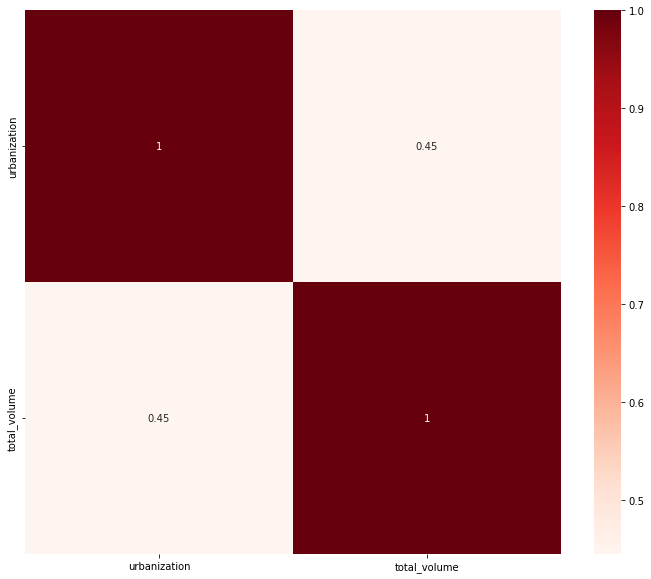

In [157]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
df_1 = df.drop(["death_rate","wine","birth_rate","year", "beer", "vodka","region","gdw","champagne","brandy", "npg"], axis = 1)
cor = df_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

It seems that regions with higher urbanization levels tend to drink more. There is also a good correlation between the urbanization level and alcohol consumption. However, of course, this doesn't describe the cause of the alchocol consumption levels since there are many other factors such as standard of living that most probably play a role.